# 1. Fundamentos


> Uno de los personajes más interesantes en la investigación sobre teoría de la complejidad en la era de la computación cuántica es Scott Aaronson. Pueden ver una una [plática](https://www.youtube.com/watch?v=JvIbrDR1G_c) suya sobre computación cuántica o leer en su [blog](https://www.scottaaronson.com/blog/) algunas explicaciones relativamente accesibles de ideas importantes de la computación cuántica.

Los orígenes de la computación cuántica pueden ser rastreados hasta [Richard Feynman](http://doc.cat-v.org/feynman/simulating-physics/simulating-physics-with-computers.pdf) y [David Deutsch](http://rspa.royalsocietypublishing.org/content/400/1818/97). Feynman considera que existe una cierta intersimulabilidad entre sistemas cuánticos, por ejemplo, entre teorías de campos cuánticos y sistemas de estado sólido. Entonces se pregunta por los sistemas cuánticos que puedan imitar cualquier sistema cuántico. Deutsch da una respuesta a esta pregunta.

El modelo de computación cuántica está basado en circuitos cuánticos, que consisten en un espacio computacional dado por *bits* cuánticos y ciertas compuertas lógicas cuánticas. En computación clásica, estamos acostumbrados a pensar que un conjunto finito de compuertas lógicas es suficiente para reproducir cualquier tabla de verdad. Esto supone una demostración de la universalidad de este conjunto de compuertas lógicas. La construcción del modelo de circuito de la computación cuántica depende también de teoremas de universalidad que reduzcan a una cantidad finita el número de compuertas lógicas para reproducir cualquier operación sobre el espacio de *qubits*. A continuación repasaremos estos resultados técnicos necesarios para la construcción del esquema de computación cuántico. La referencia para este material es *Quantum Information and Computation* de Nielsen & Chuang.


## 1.1 Operaciones sobre un *qubit*

El sistema cuántico más sencillo es un sistema de dos niveles, o sea, un qubit. Entonces la construcción de la computación cuántica comienza por las operaciones que se pueden realizar sobre un *qubit*.

Un qubit es un sistema físico cuyo estado $|\psi\rangle = a|0\rangle + b|1\rangle$ está caracterizado por dos números $a$, $b$ complejos tales que $|a|^2 + |b|^2 = 1$. El espacio de estados de ub *qubit* es $\mathbb{C}^2$. Las operaciones sobre *qubits* están representadas por matrices 2$\times$2 unitarias, de modo que el tamaño de los estados cuánticos se preserve. Algunas de estas operaciones están representadas por las matrices de Pauli,

$$
X = 
\begin{pmatrix}
 0 & 1 \\
 1 & 0
\end{pmatrix},
\quad
Y =
\begin{pmatrix}
 0 & -i \\
 i & 0
\end{pmatrix} \quad
Z = 
\begin{pmatrix}
 1 & 0 \\
 0 & -1
\end{pmatrix}.
$$

Noten, por ejemplo, que la matriz $X$ implementa la compuerta lógica NOT. Otras compuertas lógicas son la compuerta de Hadamard (H), la compuerta de fase (S) y la compuerta $\pi/8$ (T), representadas por las matrices

$$
 H = \frac{1}{\sqrt{2}}
  \begin{pmatrix}
   1 & 1 \\
   1 & -1
  \end{pmatrix},
  \qquad
  S =
  \begin{pmatrix}
   1 & 0 \\
   0 & i
  \end{pmatrix},
  \qquad
  T =
  \begin{pmatrix}
   1 & 0 \\
   0 & \exp(i\pi/4)
  \end{pmatrix},
$$

respectivamente. Los símbolos que típicamente se usan para denotar a las compuertas lógicas sobre un sólo *qubit* son los siguientes:

![Compuertas cuánticas sobre un *qubit*](figs/single_qubit_gates.gif)


## 1.2 Operaciones controladas

Las operaciones controladas involucran a dos *qubits*. Si el estado del primer *qubit* es $|1\rangle$, entonces se ejecuta la operación sobre el segundo *qubit*; si el estado del primer *qubit* es $|0\rangle$, no pasa nada sobre el segundo *qubit*. La operación controlada prototípica es NOT controlada (CNOT), donde el primer *qubit* controla si el segundo *qubit* es negado. La acción de CNOT es

$$
|c\rangle |t\rangle\longrightarrow |c\rangle|t\oplus c\rangle,
$$

cuya representación matricial es

$$
 \begin{pmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 1 & 0
 \end{pmatrix}
 = 
 \begin{pmatrix}
  \mathbf{1}_2 & 0 \\
  0 & X
 \end{pmatrix}
$$

y cuyo símbolo es

![CNOT](figs/controlled_not.png)


## 1.3 Mediciones

Las mediciones se realizan en la base computacional, es decir, si el estado de un conjunto de $n$ *qubits* es $|\Psi\rangle$ ($\in (\mathbb{C}^2)^{\otimes n}$, el producto tensorial de $n$ *qubits*), entonces la medición del $i$-ésimo *qubit* se realiza en la base $\{|0\rangle_i, |1\rangle_i\}$ con probabilidades $|\langle\Psi|0\rangle_i|^2$, $|\langle\Psi|1\rangle_i|^2$, respectivamente. La manera en que se denota a una medición es
![medicion](figs/measurement.png)


## 1.4 Implementación en **qiskit**

Ahora vamos a usar **qiskit** para invocar todas estos elementos. Supongamos que queremos generar un circuito cuántico donde con los siguientes elementos:

- **espacio computacional**: 2 *qubits*
- **compuertas lógicas**: NOT sobre el primer *qubit*, Hadamard sobre el segundo *qubit*, CNOT usando el segundo *qubit* como control y el primer *qubit* como *target*.
- **medición**: después de la inicialización y después de cada compuerta lógica.

> **Problema 1.1:** Escribe la secuencia de transformaciones del estado $|00\rangle$ a lo largo del circuito cuántico. ¿Qué resultados esperas medir tras cada operación?

Importamos todo lo que necesitamos

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from qiskit import Aer

Definimos el simulador de nuestro circuito

In [2]:
simulator = Aer.get_backend('qasm_simulator')

El circuito contiene dos *qubits* y dos registros clásicos que contengan los *bits* clásicos que resulten de las mediciones sobre los *qubits*.

In [3]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

Los *qubits* son indexados según ```qr[0], qr[1]``` (recordando que los índices en Python comienzan en 0). De igual forma son indexados los *bits*.

Definimos el circuito cuántico.

In [4]:
quantum_circuit = QuantumCircuit(qr,cr)

Definimos que el circuito contenga una medición sobre los *qubits* recién inicializados. Esto nos permite descubrir en qué estado se inicializan los *qubits*.

In [5]:
quantum_circuit.measure(qr,cr)

Las mediciones miden un estado en superposición de $|0\rangle$ y $|1\rangle$, colapsando a uno de estos estados, que pueden ser almacenados en *bits* clásicos. En la línea anterior, entonces medimos todos los *qubits* ```qr``` y transferimos los resultados a ```cr```. Podemos medir un sólo *qubit* mediante ```quantum_circuit.measure(qr[0],cr[0])```, por ejemplo, que mide el primer *qubit*.

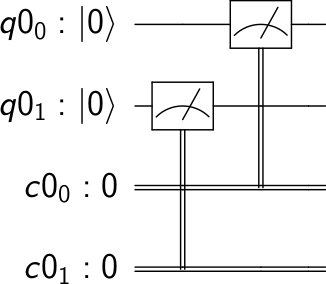

In [6]:
circuit_drawer(quantum_circuit)

Simulamos el circuito hasta este punto y guardamos los resultados.

In [7]:
job1 = execute(quantum_circuit, backend=simulator, shots = 2000).result()

Las compuertas cuánticas están implementadas como métodos dentro de la clase QuantumCircuit, de la cual ```quantum_circuit``` es una instancia. La forma en que pueden invocar las compuertas lógicas anteriores es


```
 NOT, X: quantum_circuit.x(registro_cuantico)
 Y: quantum_circuit.y(registro_cuantico)
 Z: quantum_circuit.z(registro_cuantico)
 H: quantum_circuit.h(registro_cuantico)
 S: quantum_circuit.s(registro_cuantico)
 T: quantum_circuit.t(registro_cuantico)
 CNOT: quantum_circuit.cx(registro_control, registro_target)
```

 [Acá](https://qiskit.org/documentation/_autodoc/qiskit._quantumcircuit.html#qiskit._quantumcircuit.QuantumCircuit) está la lista completa de lo que pueden hacer sobre una instancia de QuantumCircuit.
 
 Entonces dijimos que íbamos a implementar NOT sobre el primer *qubit*.

In [8]:
quantum_circuit.x(qr[0])

Definimos una medición.

In [9]:
quantum_circuit.measure(qr,cr)

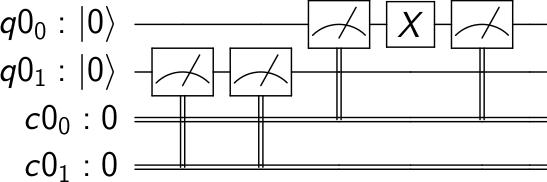

In [10]:
circuit_drawer(quantum_circuit)

Simulamos el circuito hasta este punto y guardamos los resultados.

In [11]:
job2 = execute(quantum_circuit, backend=simulator, shots = 2000).result()

Implementamos ahora la compuerta de Hadamard sobre el segundo qubit, definimos una medición, simulamos los resultados y los guardamos.

In [12]:
quantum_circuit.h(qr[1])

In [13]:
quantum_circuit.measure(qr,cr)

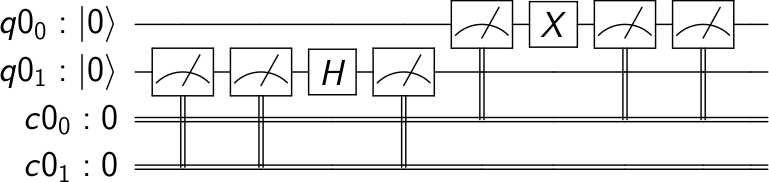

In [14]:
circuit_drawer(quantum_circuit)

In [15]:
job3 = execute(quantum_circuit, backend=simulator, shots = 2000).result()

Ahora, implementamos una compuerta NOT controlada, donde el primer *qubit* controla si se niega al segundo *qubit*.

In [16]:
quantum_circuit.cx(qr[1],qr[0])

Definimos la medición sobre todos los qubits.

In [17]:
quantum_circuit.measure(qr,cr)

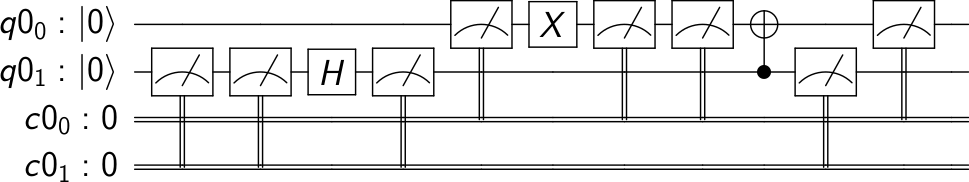

In [18]:
circuit_drawer(quantum_circuit)

Simulamos el circuito hasta este punto y guardamos los resultados.

In [19]:
job4 = execute(quantum_circuit, backend=simulator, shots = 2000).result()

Los resultados de las cuatro mediciones que hacemos pueden visualizarse en histogramas que muestren la cantidad de veces que alguno de los posibles estados de dos *qubits* fue medido. Finalmente, a continuación mostramos esos histogramas, como una función de **qiskit**.

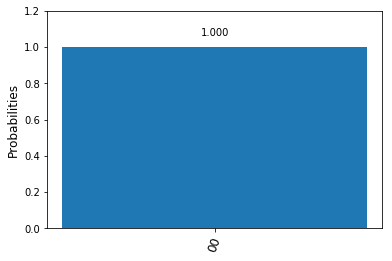

In [20]:
plot_histogram(job1.get_counts())

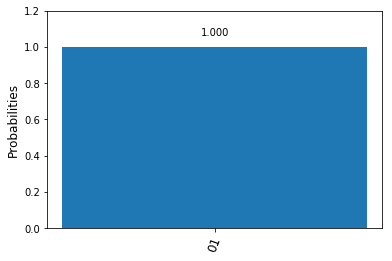

In [21]:
plot_histogram(job2.get_counts())

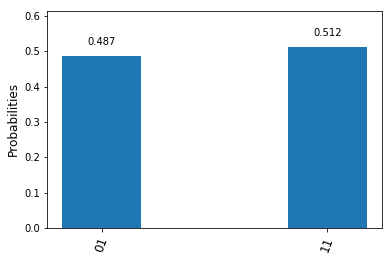

In [22]:
plot_histogram(job3.get_counts())

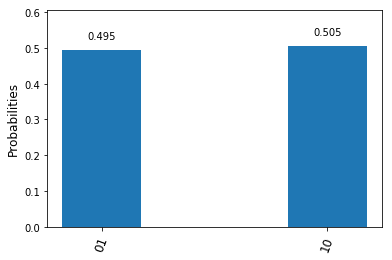

In [23]:
plot_histogram(job4.get_counts())

¿Coinciden estos resultados con tus predicciones?

> **Problema 1.2:** Considera un circuito cuántico con un par de qubits en el estado $|00\rangle$. Diseña circuitos cuánticos, usando las compuertas anteriores, que produzcan los estados de Bell. Los estados de Bell son
>
>$$ 
\begin{aligned}
|\beta_{00}\rangle & = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right), \\
|\beta_{01}\rangle & = \frac{1}{\sqrt{2}}\left(|01\rangle + |01\rangle\right), \\
|\beta_{10}\rangle & = \frac{1}{\sqrt{2}}\left(|01\rangle - |01\rangle\right), \\
|\beta_{11}\rangle & = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right). 
\end{aligned}
$$